<a href="https://colab.research.google.com/github/shumshersubashgautam/Cellpainting-Visualization-RXRX1-Recursion/blob/main/RXRX19b_DataVisualization_recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install scanpy==1.9.3 anndata==0.9.1 umap numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.10 squidpy==1.1.2

In [3]:
!git clone https://github.com/theislab/batch_correction_cellpainting.git

Cloning into 'batch_correction_cellpainting'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 234 (delta 52), reused 59 (delta 33), pack-reused 129
Receiving objects: 100% (234/234), 62.98 MiB | 17.91 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [4]:
cd cells

/content/cells


In [7]:
# !pip install scArches

In [10]:
# !pip install mvtcr
# !pip install multigrate

In [11]:
import scanpy as sc
import pandas as pd
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bcc.utils import plot_well_type_positions
%matplotlib inline

In [12]:
!wget https://storage.googleapis.com/rxrx/rxrx19b/rxrx19b-metadata.zip

--2023-06-24 10:59:43--  https://storage.googleapis.com/rxrx/rxrx19b/rxrx19b-metadata.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1995416 (1.9M) [application/zip]
Saving to: ‘rxrx19b-metadata.zip’

rxrx19b-metadata.zi 100%[===================>]   1.90M  3.85MB/s    in 0.5s    

2023-06-24 10:59:44 (3.85 MB/s) - ‘rxrx19b-metadata.zip’ saved [1995416/1995416]



In [14]:
!unzip /content/cells/rxrx19b-metadata.zip

Archive:  /content/cells/rxrx19b-metadata.zip
   creating: rxrx19b/
  inflating: rxrx19b/README.md       
  inflating: rxrx19b/LICENSE         
  inflating: rxrx19b/metadata.csv    


In [13]:
!wget https://storage.googleapis.com/rxrx/rxrx19b/rxrx19b-dl-embeddings.zip

--2023-06-24 11:00:01--  https://storage.googleapis.com/rxrx/rxrx19b/rxrx19b-dl-embeddings.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42516749 (41M) [application/zip]
Saving to: ‘rxrx19b-dl-embeddings.zip’

rxrx19b-dl-embeddin 100%[===================>]  40.55M  13.3MB/s    in 3.0s    

2023-06-24 11:00:05 (13.3 MB/s) - ‘rxrx19b-dl-embeddings.zip’ saved [42516749/42516749]



In [15]:
!unzip /content/cells/rxrx19b-dl-embeddings.zip

Archive:  /content/cells/rxrx19b-dl-embeddings.zip
replace rxrx19b/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: rxrx19b/README.md       
replace rxrx19b/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: rxrx19b/LICENSE         
  inflating: rxrx19b/embeddings.csv  


In [18]:
meta_file = "/content/cells/rxrx19b/metadata.csv"
embedding_file = "/content/cells/rxrx19b/embeddings.csv"
if not os.path.exists(meta_file):
    raise FileNotFoundError("Please download the metadata from https://www.rxrx.ai/rxrx19b and put the file metadata.csv in the directory data/rxrx19b")
if not os.path.exists(embedding_file):
    raise FileNotFoundError("Please download the embeddings from https://www.rxrx.ai/rxrx19b and put the file embeddings.csv")

In [19]:
adata = sc.read_csv(embedding_file)
meta = pd.read_csv(meta_file, index_col = 0)
# change the order of the rows in the meta data to match the order in the embeddings
meta = meta.reindex(pd.read_csv(embedding_file, index_col = 0).index)
adata.obs = meta
# Split 'well' column into 'well_row' and 'well_column'
adata.obs[['well_row', 'well_column']] = adata.obs['well'].str.extract(r'([A-Z]+)(\d+)')
# Replace NaN values with "blank" in a specific column
adata.obs['disease_condition'] = adata.obs['disease_condition'].fillna("blank")
print(adata)
meta.tail(n=5)

AnnData object with n_obs × n_vars = 70384 × 128
    obs: 'well_id', 'cell_type', 'experiment', 'plate', 'well', 'site', 'disease_condition', 'treatment', 'treatment_conc', 'SMILES', 'well_row', 'well_column'


well_id cell_type experiment  plate well  site  \
site_id                                                                 
HUVEC-1_9_Z42_1  HUVEC-1_9_Z42     HUVEC    HUVEC-1      9  Z42     1   
HUVEC-1_9_Z43_1  HUVEC-1_9_Z43     HUVEC    HUVEC-1      9  Z43     1   
HUVEC-1_9_Z45_1  HUVEC-1_9_Z45     HUVEC    HUVEC-1      9  Z45     1   
HUVEC-1_9_Z46_1  HUVEC-1_9_Z46     HUVEC    HUVEC-1      9  Z46     1   
HUVEC-1_9_Z47_1  HUVEC-1_9_Z47     HUVEC    HUVEC-1      9  Z47     1   

                disease_condition    treatment  treatment_conc  \
site_id                                                          
HUVEC-1_9_Z42_1           healthy          NaN           0.000   
HUVEC-1_9_Z43_1      storm-severe   Netupitant           1.000   
HUVEC-1_9_Z45_1      storm-severe  Penciclovir           1.000   
HUVEC-1_9_Z46_1      storm-severe   tilmicosin           0.025   
HUVEC-1_9_Z47_1      storm-severe     Itopride           0.025   

                                                            SMILES well_row  \
site_id                                                                       
HUVEC-1_9_Z42_1                                                NaN        Z   
HUVEC-1_9_Z43_1  CN(C(=O)C(C)(C)C1=CC(=CC(=C1)C(F)(F)F)C(F)(F)F...        Z   
HUVEC-1_9_Z45_1    NC1=NC(=O)C2=C(N1)N(CCC(CO)CO)C=N2 |c:5,17,t:1|        Z   
HUVEC-1_9_Z46_1  CC[C@@H]1OC(=O)C[C@@H](O)[C@H](C)[C@@H](O[C@@H...        Z   
HUVEC-1_9_Z47_1  COC1=C(OC)C=C(C=C1)C(=O)NCC1=CC=C(OCCN(C)C)C=C...        Z   

                well_column  
site_id                      
HUVEC-1_9_Z42_1          42  
HUVEC-1_9_Z43_1          43  
HUVEC-1_9_Z45_1          45  
HUVEC-1_9_Z46_1          46  
HUVEC-1_9_Z47_1          47

In [20]:
#Metadata exploration
#meta[(meta["disease_condition"] == 53) & (meta["disease_condition"] == "storm-severe")].shape[0]
meta["treatment"].value_counts()

Allopregnanolone    72
Pyrithione          36
Melphalan           36
ethotoin            36
Fluvoxamine         36
                    ..
YO-01027            24
PRT062607           24
SB239063            24
ARQ 621             24
Filgotinib          24
Name: treatment, Length: 1856, dtype: int64

**B. Looking into different batch effects:**

 1. Does the data cluster by disease_condition or by plate?

In [23]:
huvec.write_h5ad(
    "rxrx19b_huvec_only_controls.h5ad",
    compression="gzip"
)

NameError: ignored

In [24]:
# !python setup.py install

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


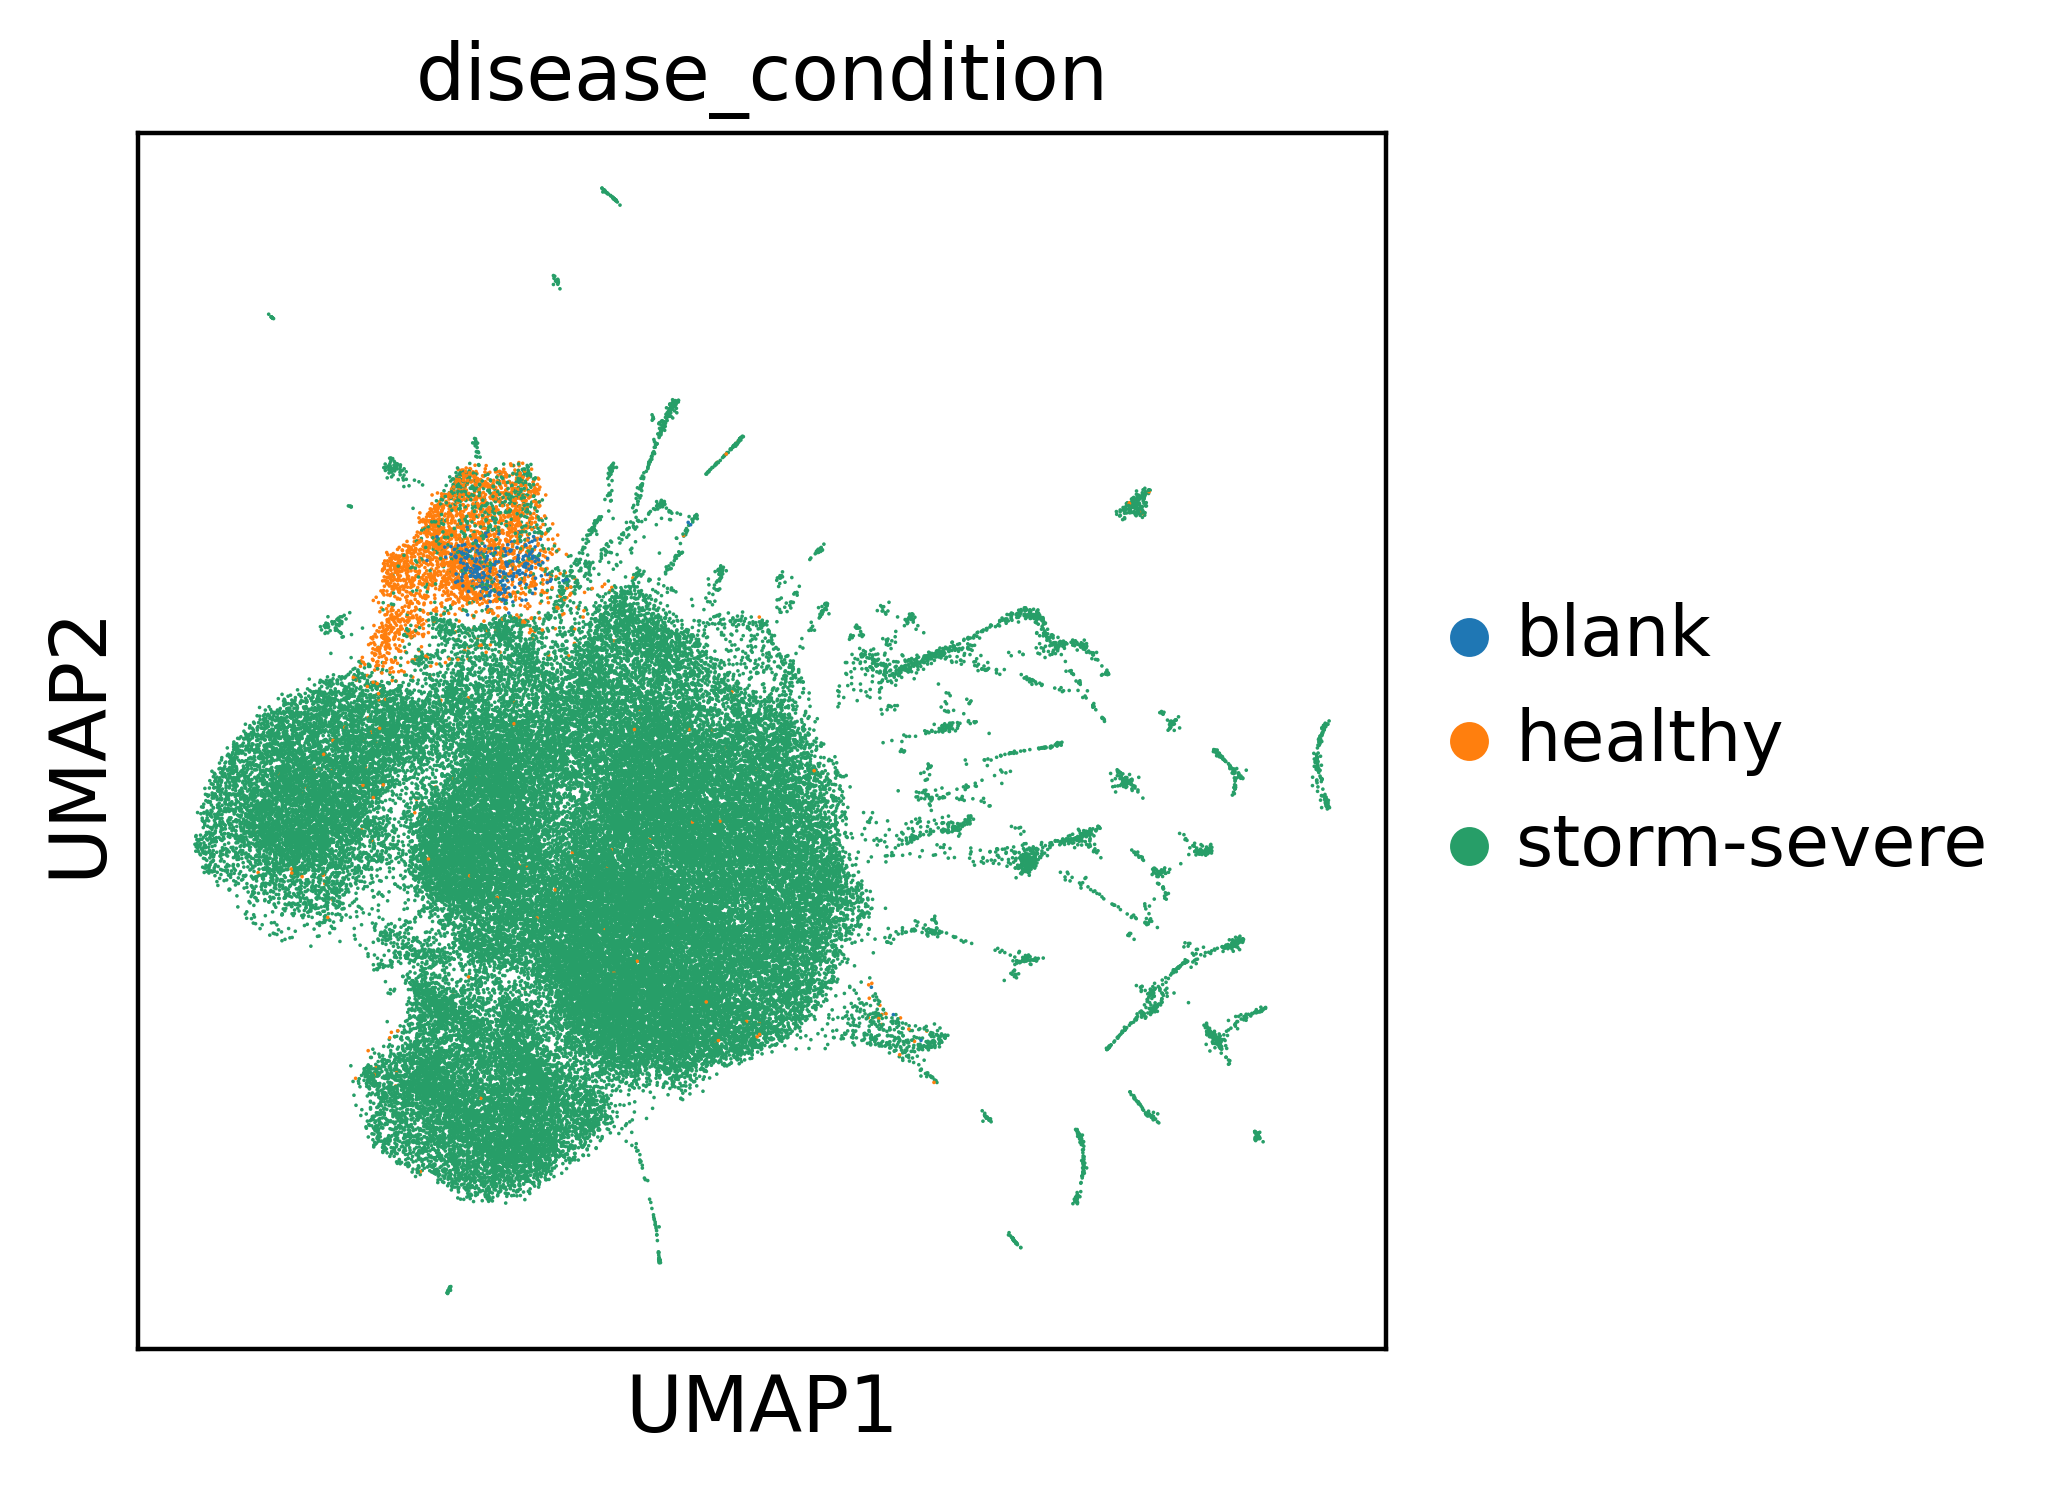

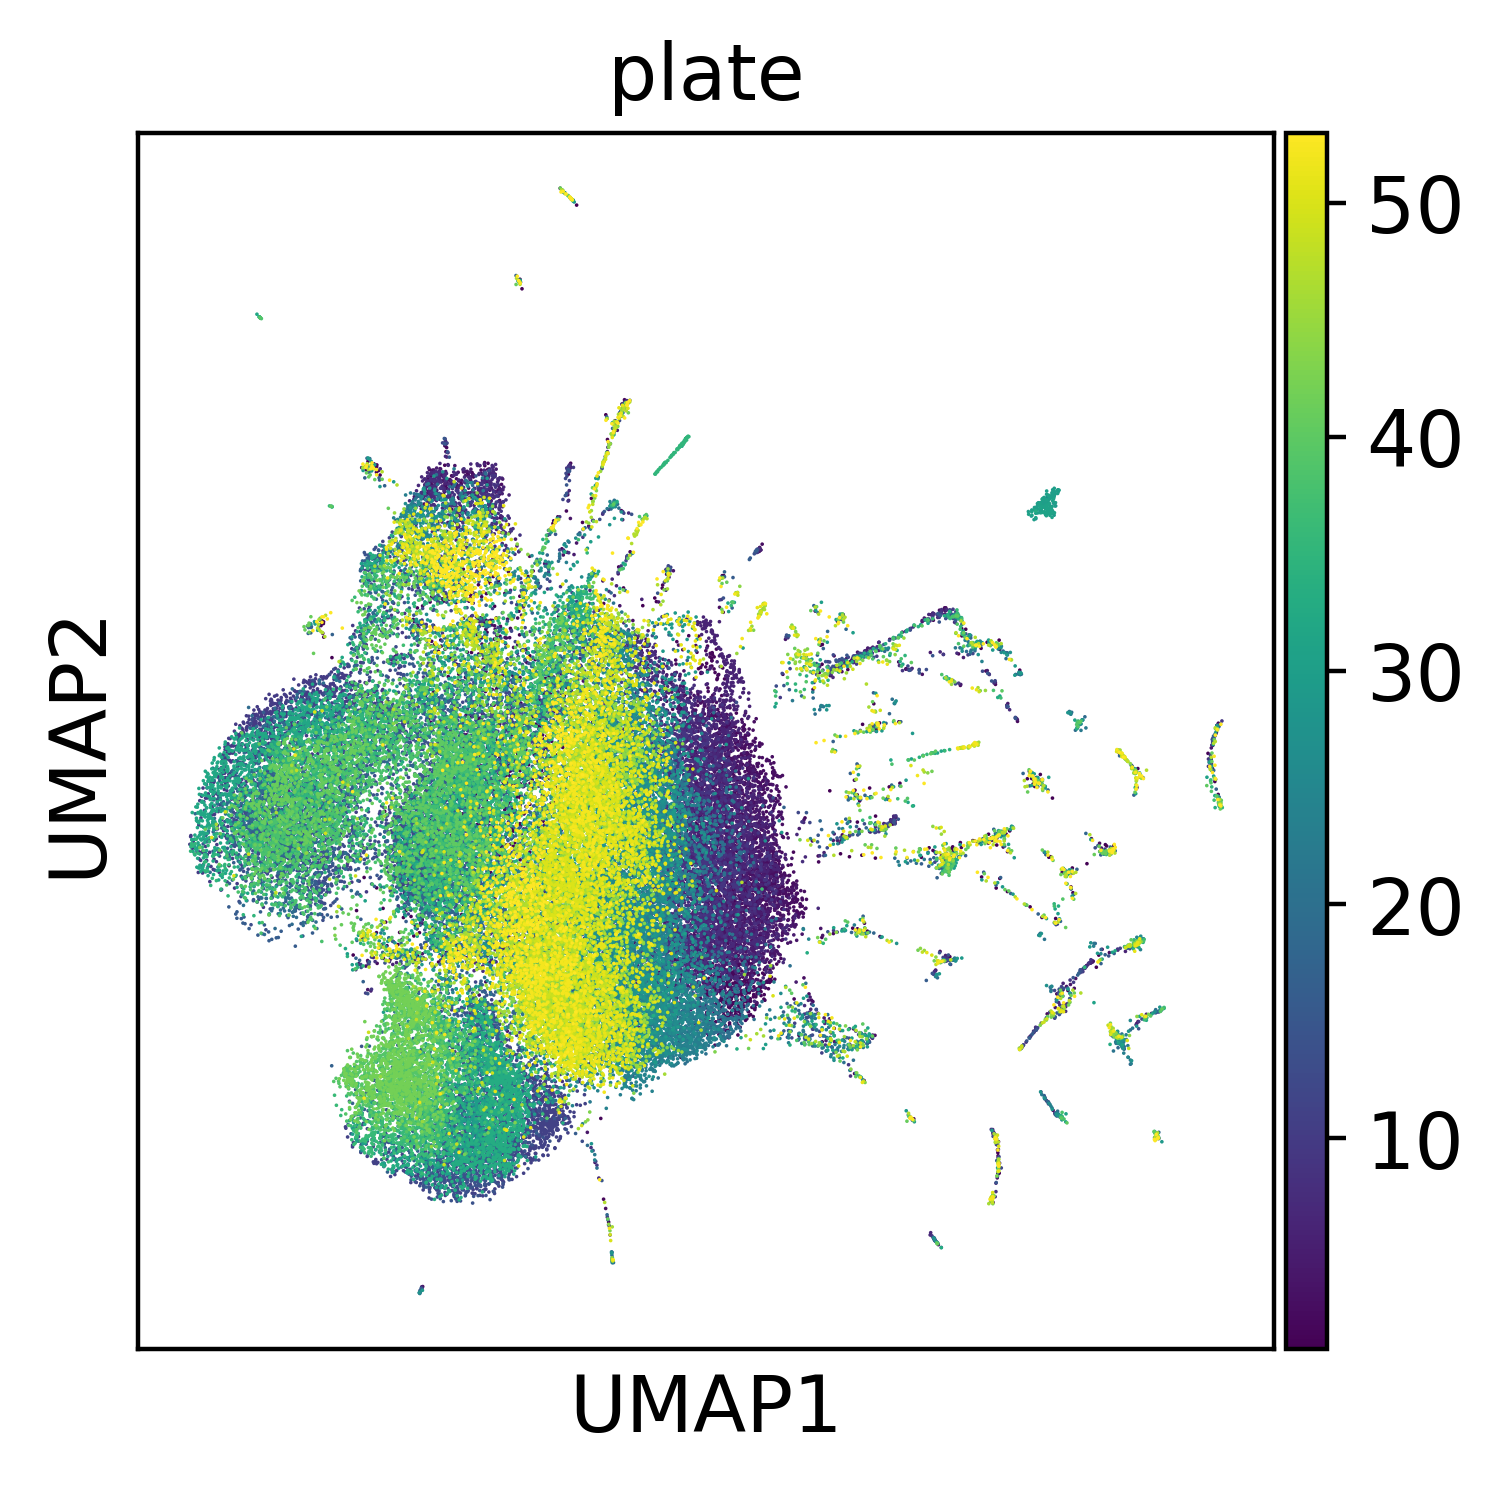

In [25]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep = "X")
sc.tl.umap(adata)
sc.pl.umap(adata, color="disease_condition")
sc.pl.umap(adata, color="plate")

We see that "storm-severe" forms seperate clusters with multiple smaller clusters and does not seem to cluster with "healthy" or "blank". We can also see that plates cluster to a certain degree as well.

2. Within plate (intra-plate) effects

-> We pick plate 53 as this is the only plate which includes the negative control along with healthy and storm-severe conditions.

Do the images cluster by well row/column, i.e. well assignment?
Do the images cluster by different disease conditions?
Do we see within the group "storm-severe" clusters of treatments?

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


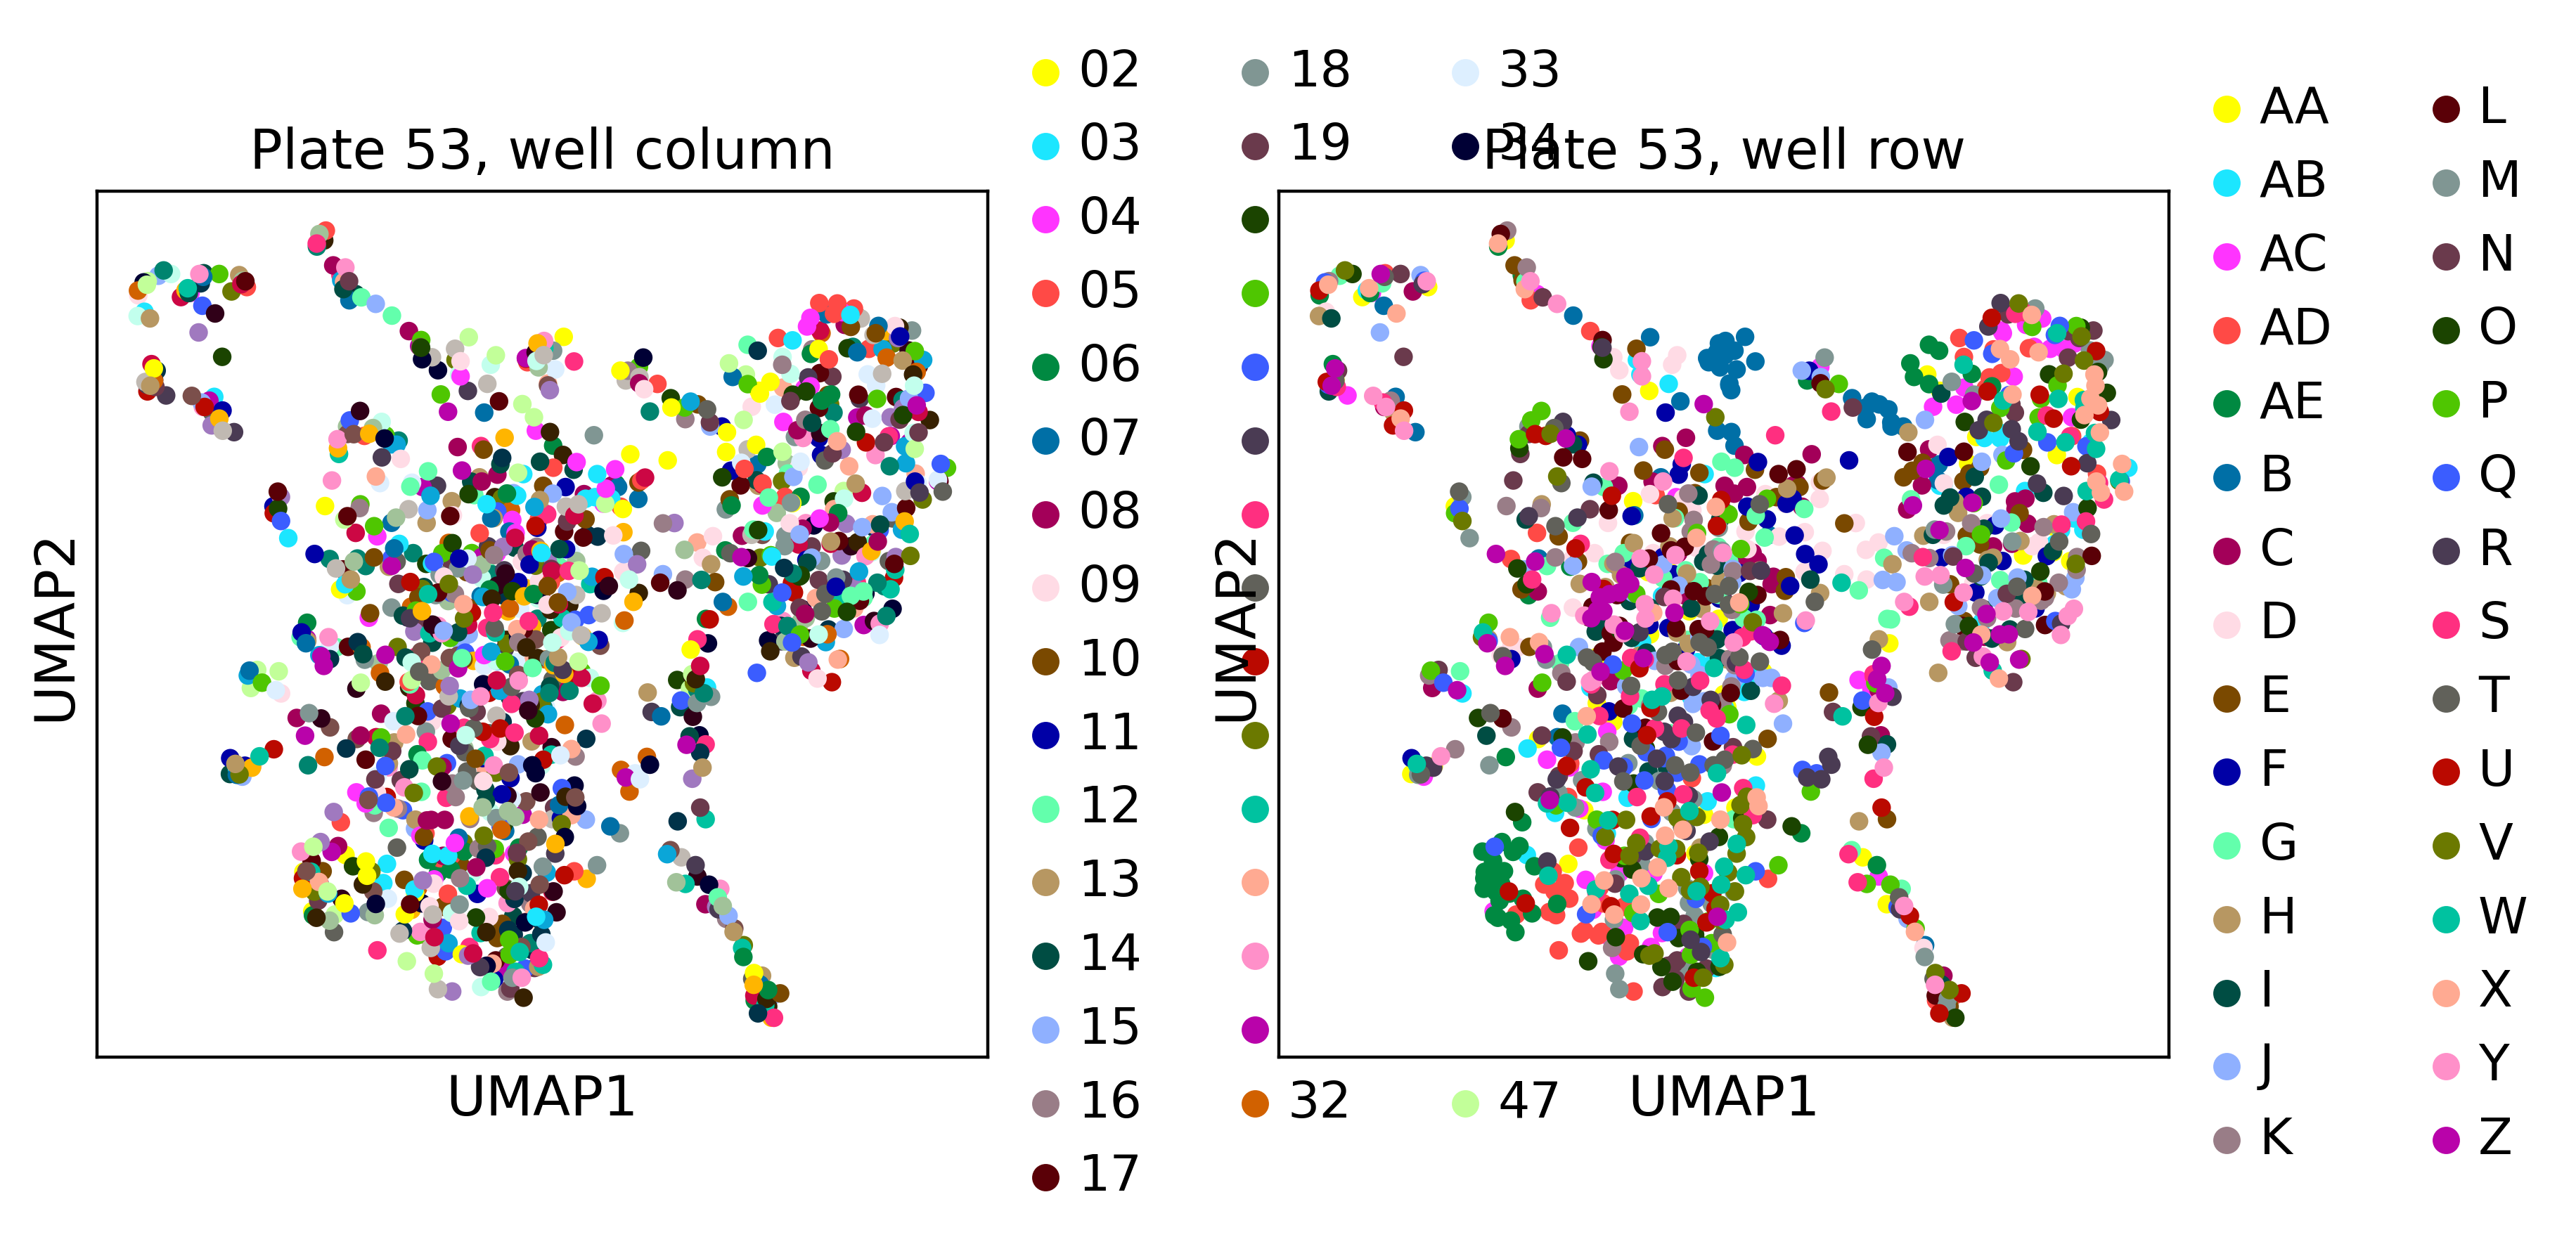

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


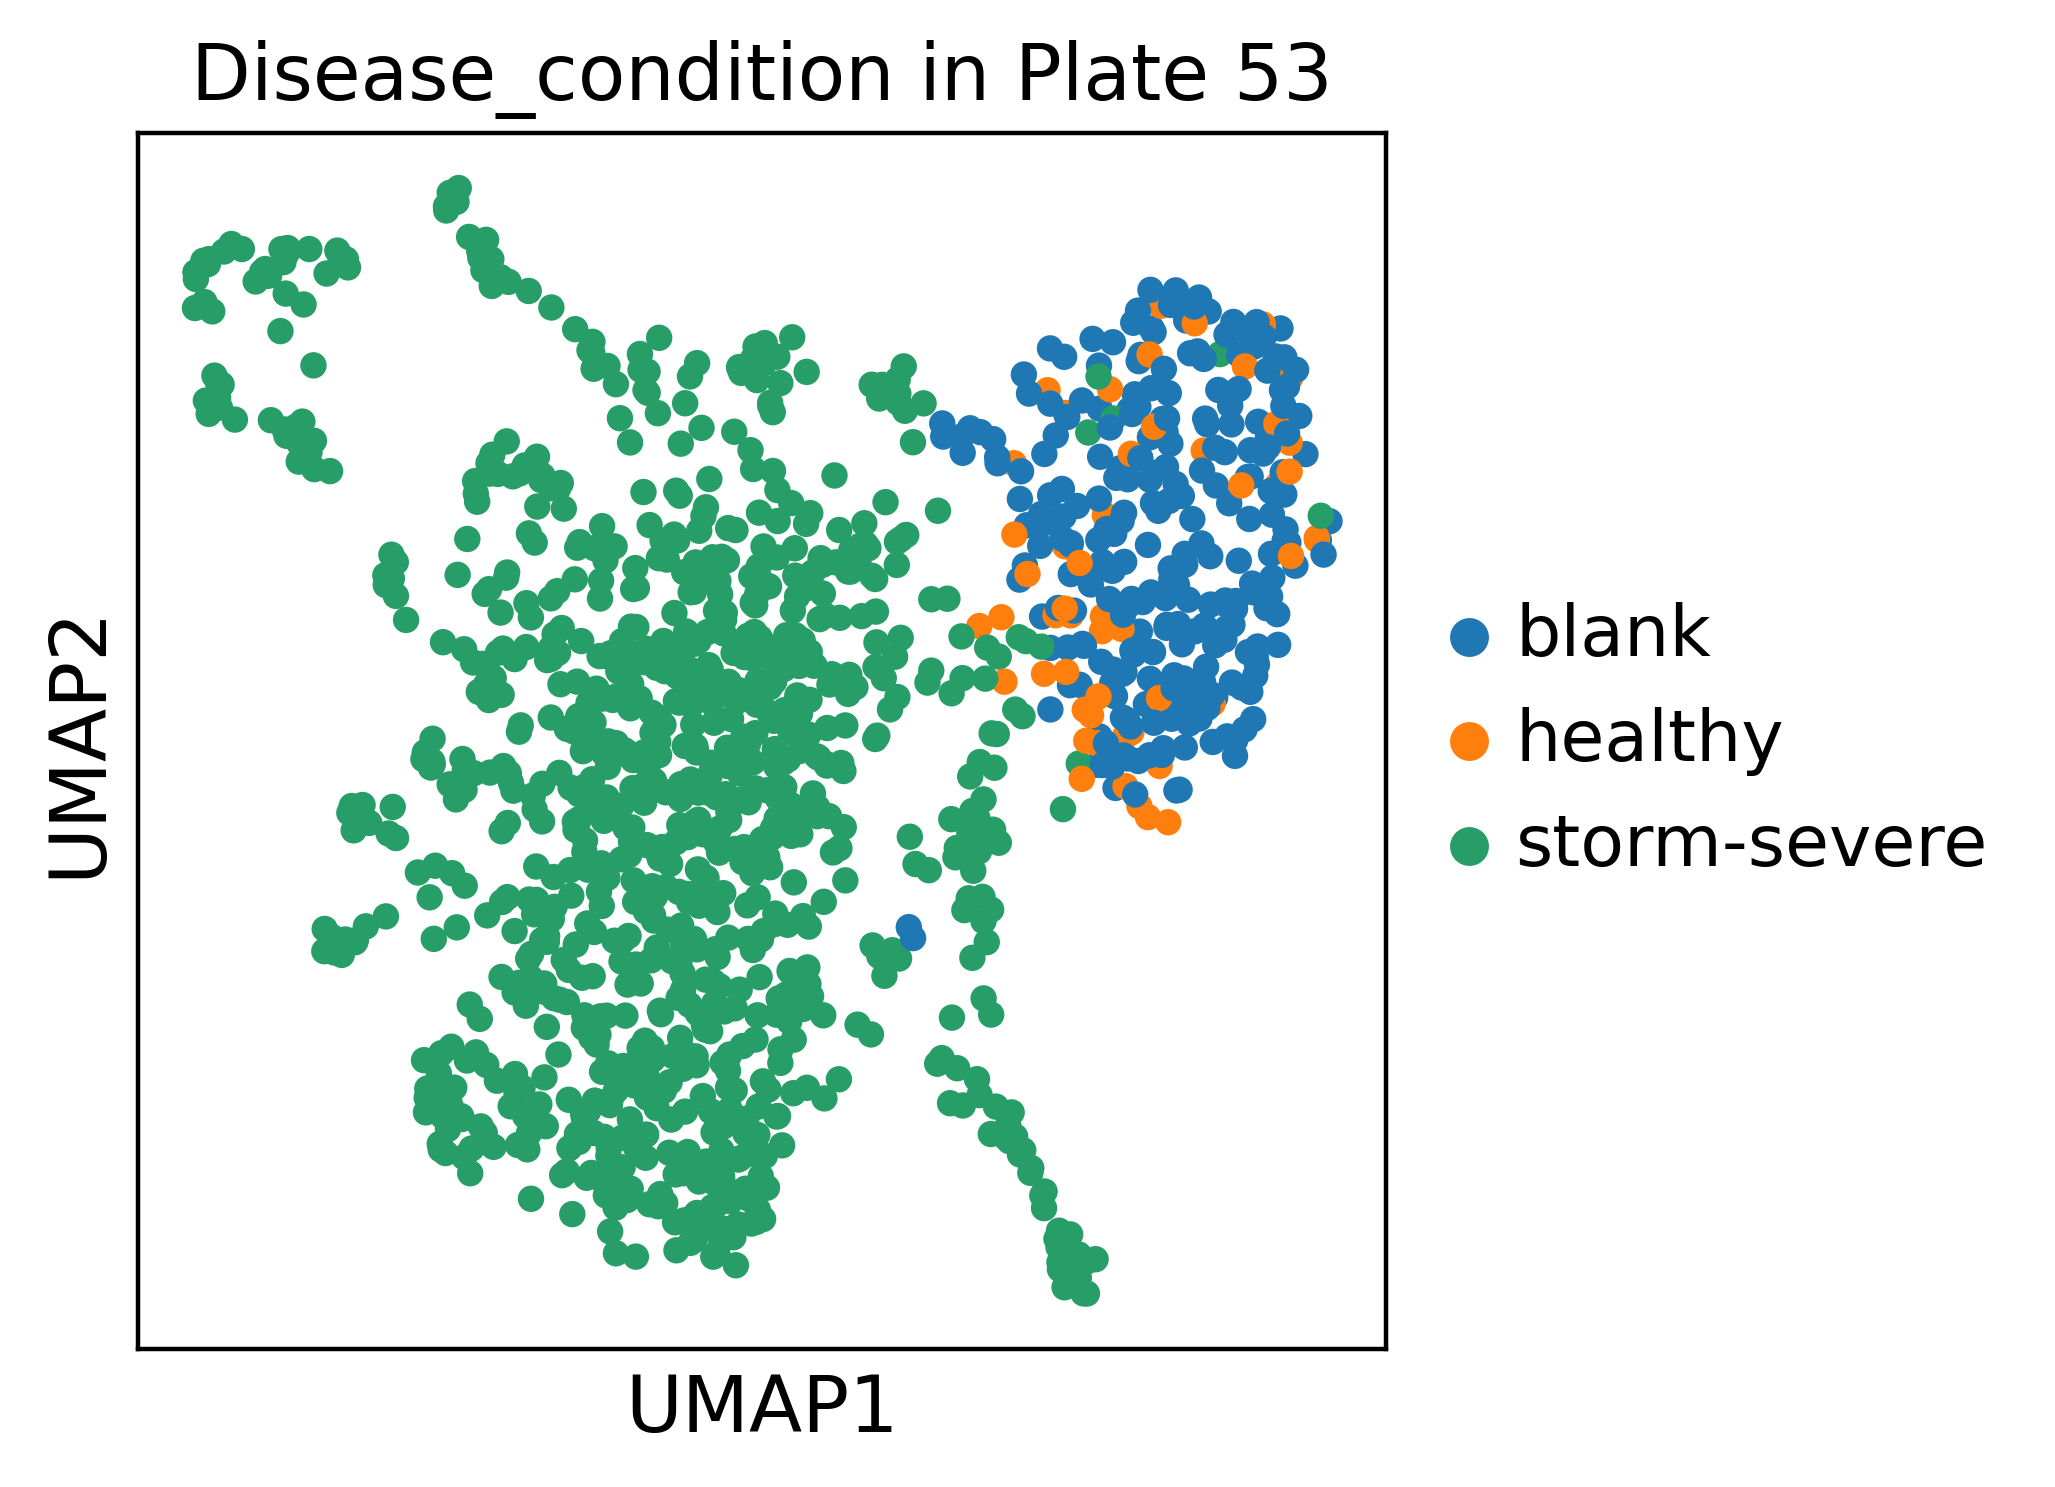

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


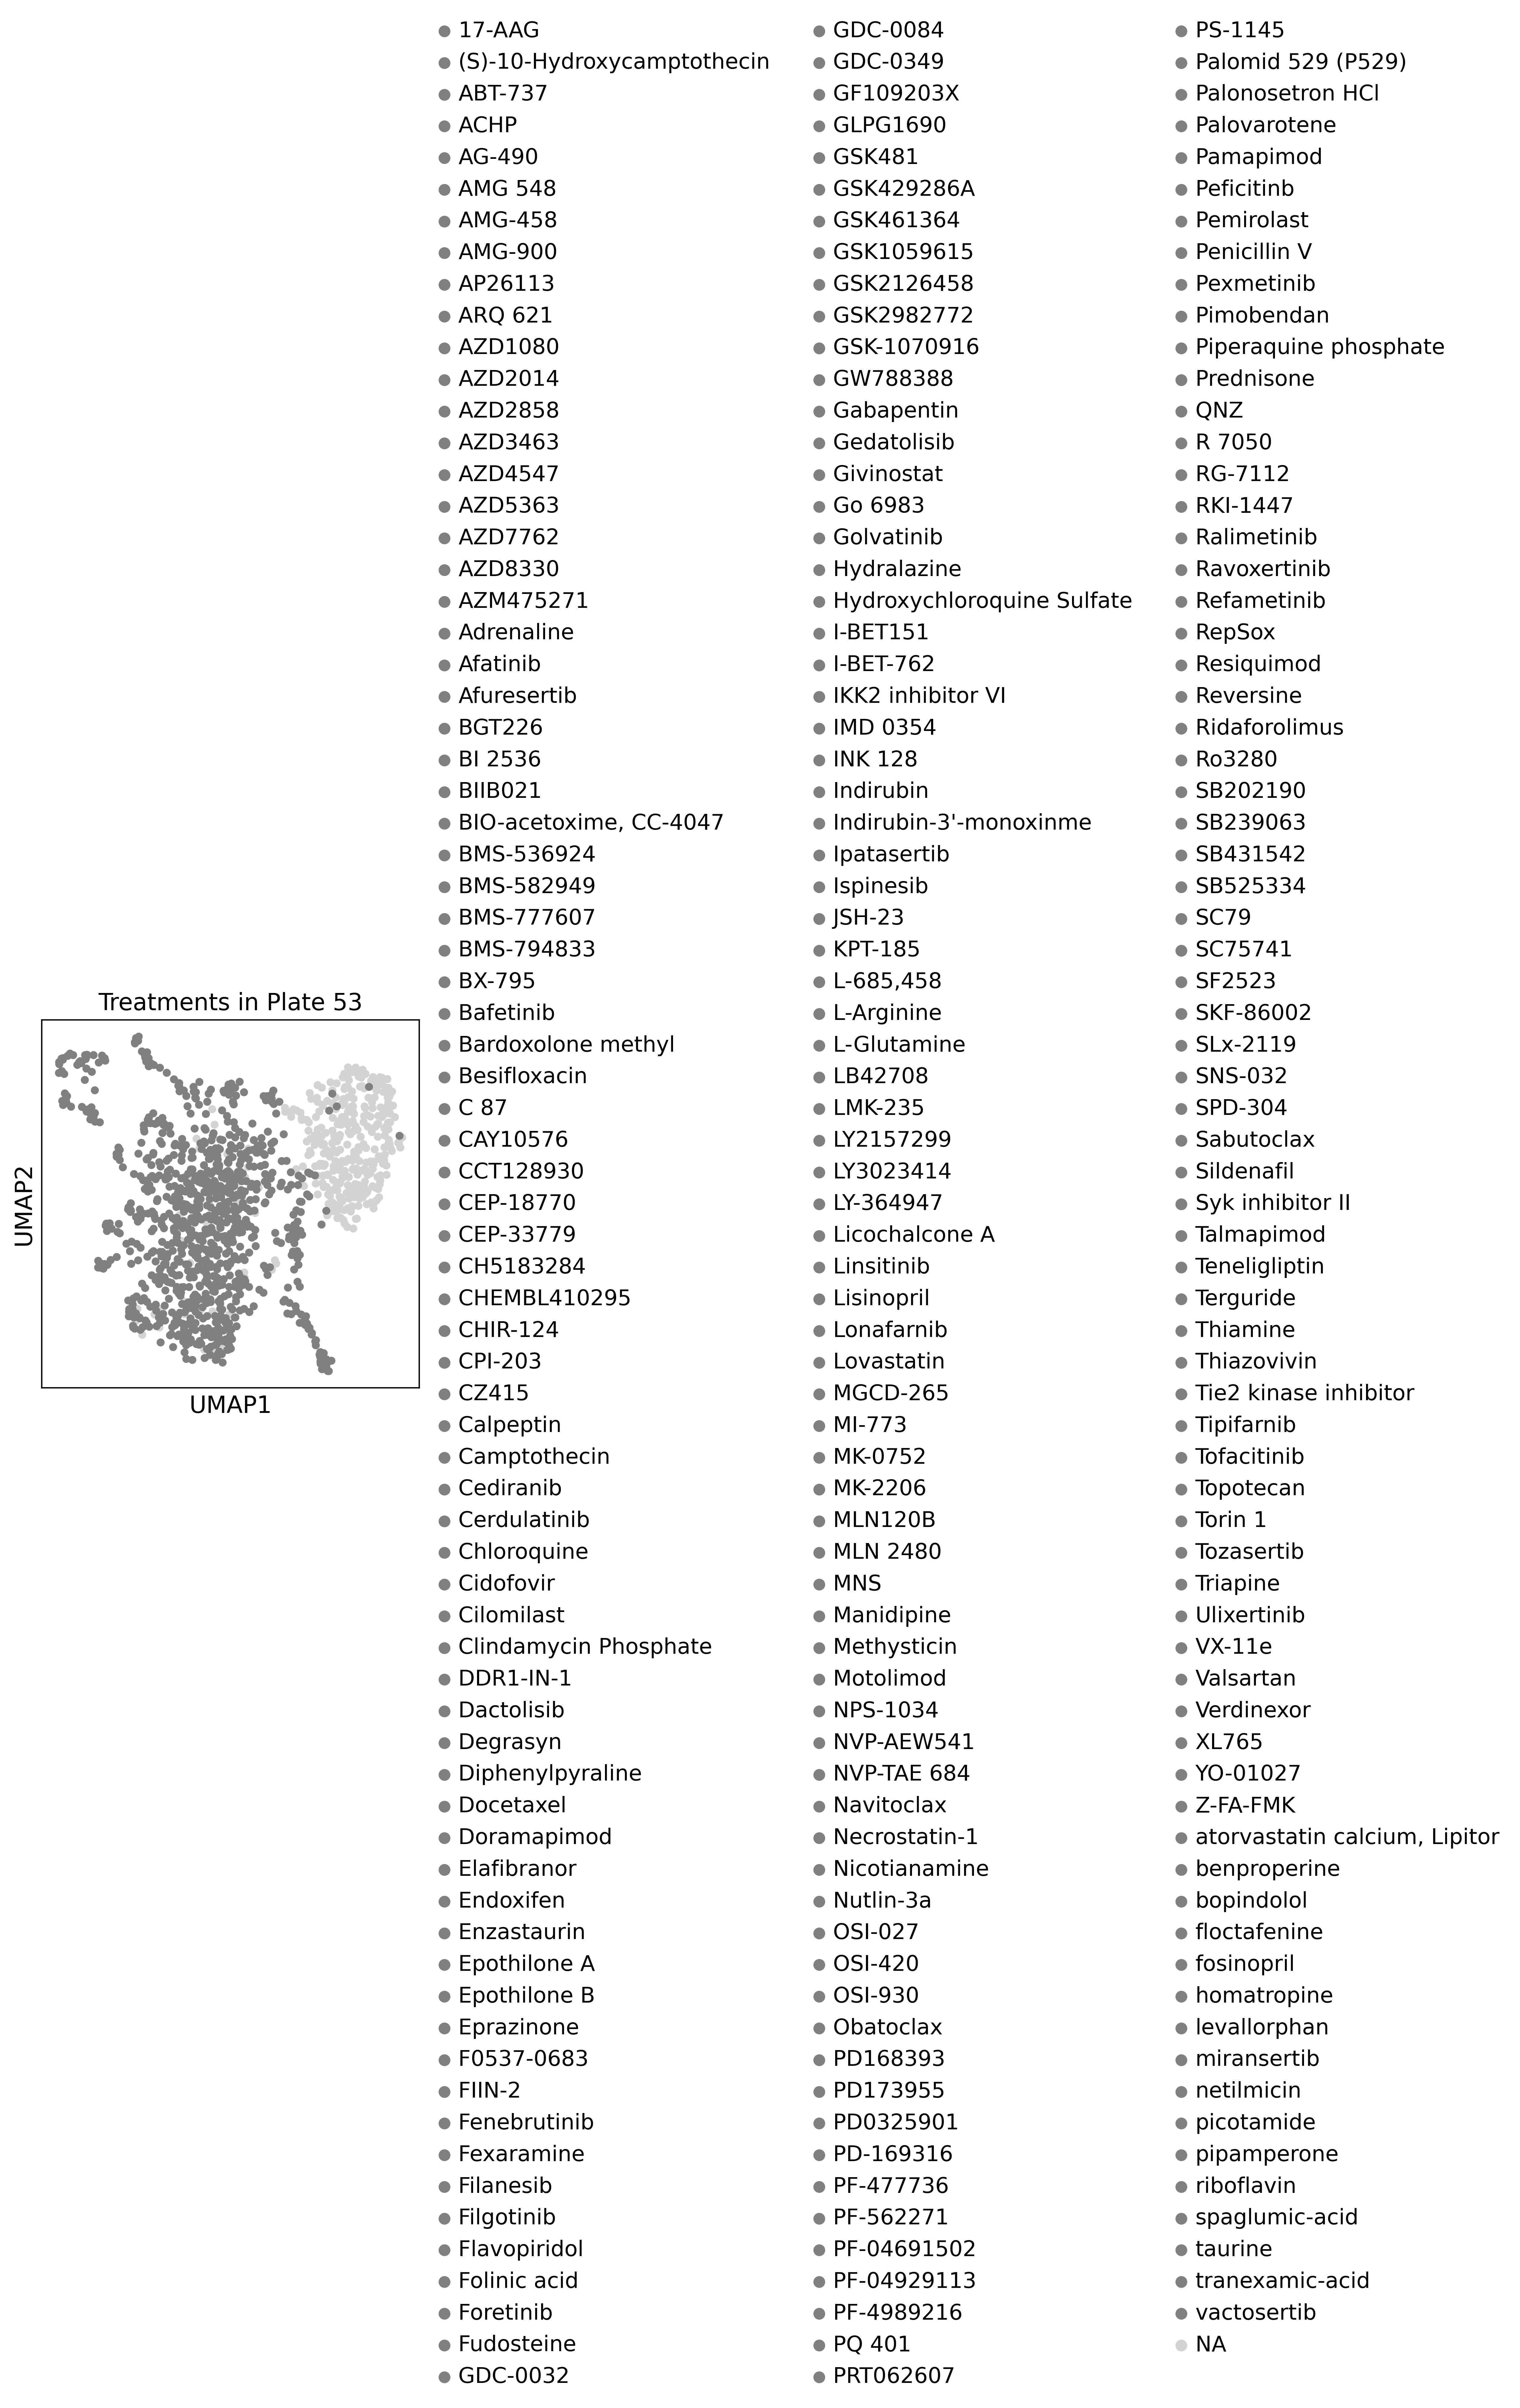

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


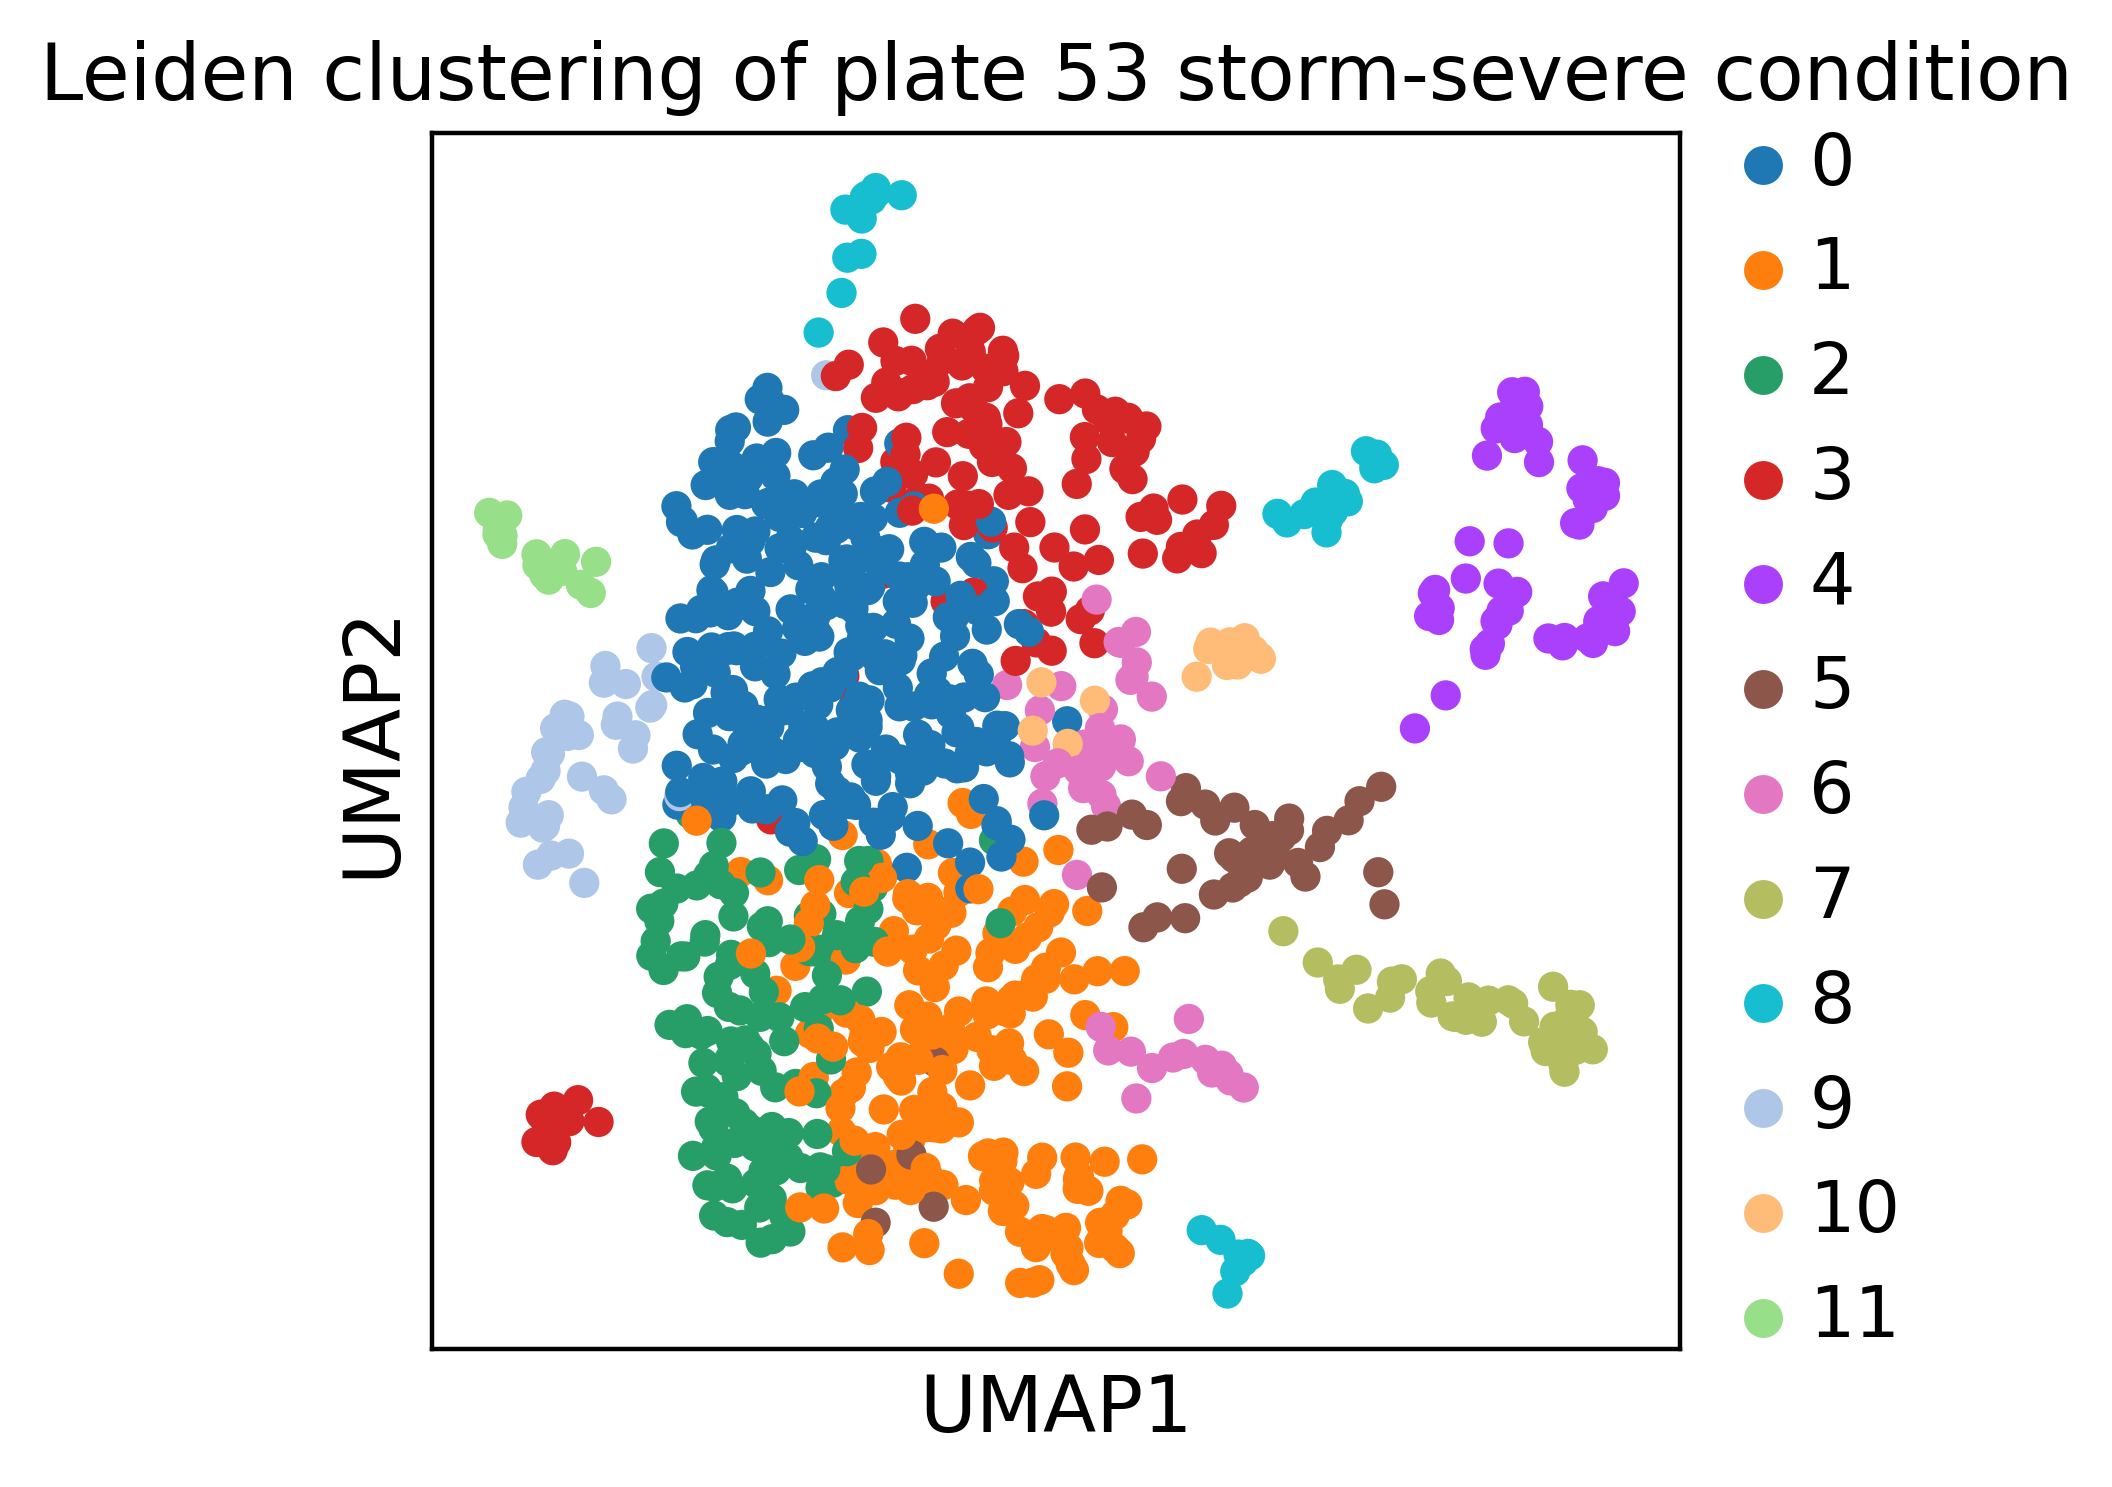

In [26]:
plate53_adata = adata[adata.obs["plate"] == 53]
sc.pp.neighbors(plate53_adata, n_neighbors=15, use_rep = "X")
sc.tl.umap(plate53_adata)
sc.pl.umap(plate53_adata, color=["well_column", "well_row"], title = ["Plate 53, well column", "Plate 53, well row"])

sc.pl.umap(plate53_adata, color=["disease_condition"], title = ["Disease_condition in Plate 53"])
sc.pl.umap(plate53_adata, color=["treatment"], title = ["Treatments in Plate 53"])

plate53_treatment = plate53_adata[plate53_adata.obs["disease_condition"] == "storm-severe"]
sc.pp.neighbors(plate53_treatment, n_neighbors=15, use_rep = "X")
sc.tl.umap(plate53_treatment)
sc.tl.leiden(plate53_treatment, resolution = 0.7)
sc.pl.umap(plate53_treatment, color=['leiden'], title = ["Leiden clustering of plate 53 storm-severe condition"])

Above we can see, that plate 53 does not cluster by well assignment. However, "storm-severe" clearly forms a seperate cluster compared to "healthy" and the negative control with no cytokines. In fact, the "healthy" and "blank" conditions seem to interminge. There are too many treatments for us to be able to tell if certain treatments cluster or not but we can make out a certain level of diversity within the "storm-severe" (and thus treated) cluster. Also, we see that some treatments (possibly outliers) are located within the "healthy" or "blank" cluster.

3. In-between plate (inter-plate) effects

Do the images cluster by plate assignment?

Subset one treatment for the "storm-severe" group and color by plate.
-> We chose Allopregnanolone since it has been used as treatment most frequently across all plates. Allopregnanolone is a neurosteroid that has been investigated for its potential therapeutic effects in COVID-19. It is a naturally occurring hormone and acts as a positive allosteric modulator of gamma-aminobutyric acid (GABA) receptors in the brain.

Does the "healthy" disease-condition cluster across plates?

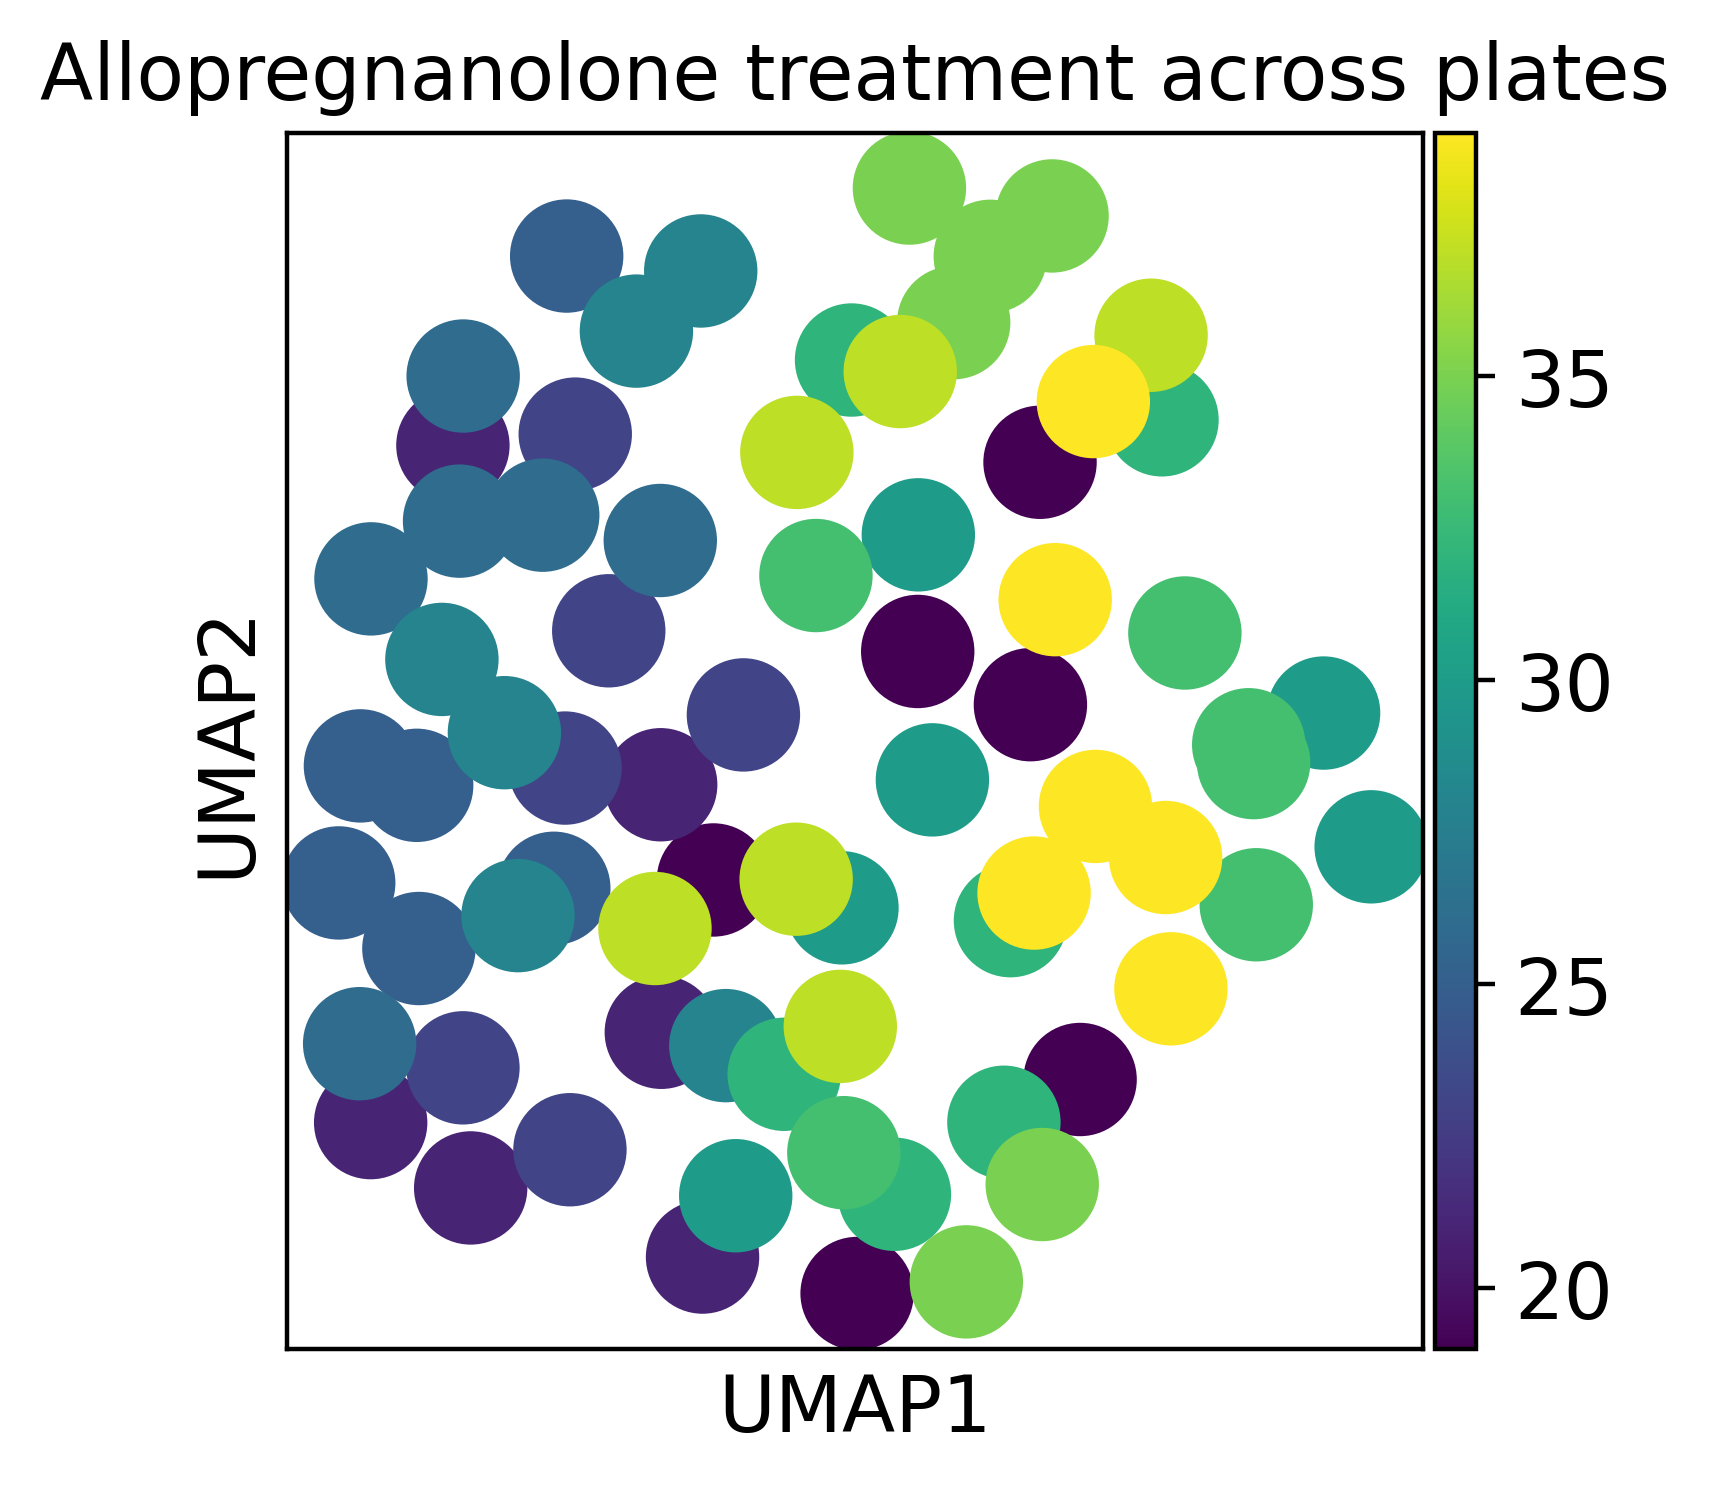

In [27]:
treatment = adata[adata.obs["disease_condition"] == "storm-severe"]
allopregnanolone_treatment = treatment[treatment.obs["treatment"] == "Allopregnanolone"]
sc.pp.neighbors(allopregnanolone_treatment, n_neighbors=15, use_rep = "X")
sc.tl.umap(allopregnanolone_treatment)
sc.pl.umap(allopregnanolone_treatment, color=["plate"], title = "Allopregnanolone treatment across plates")

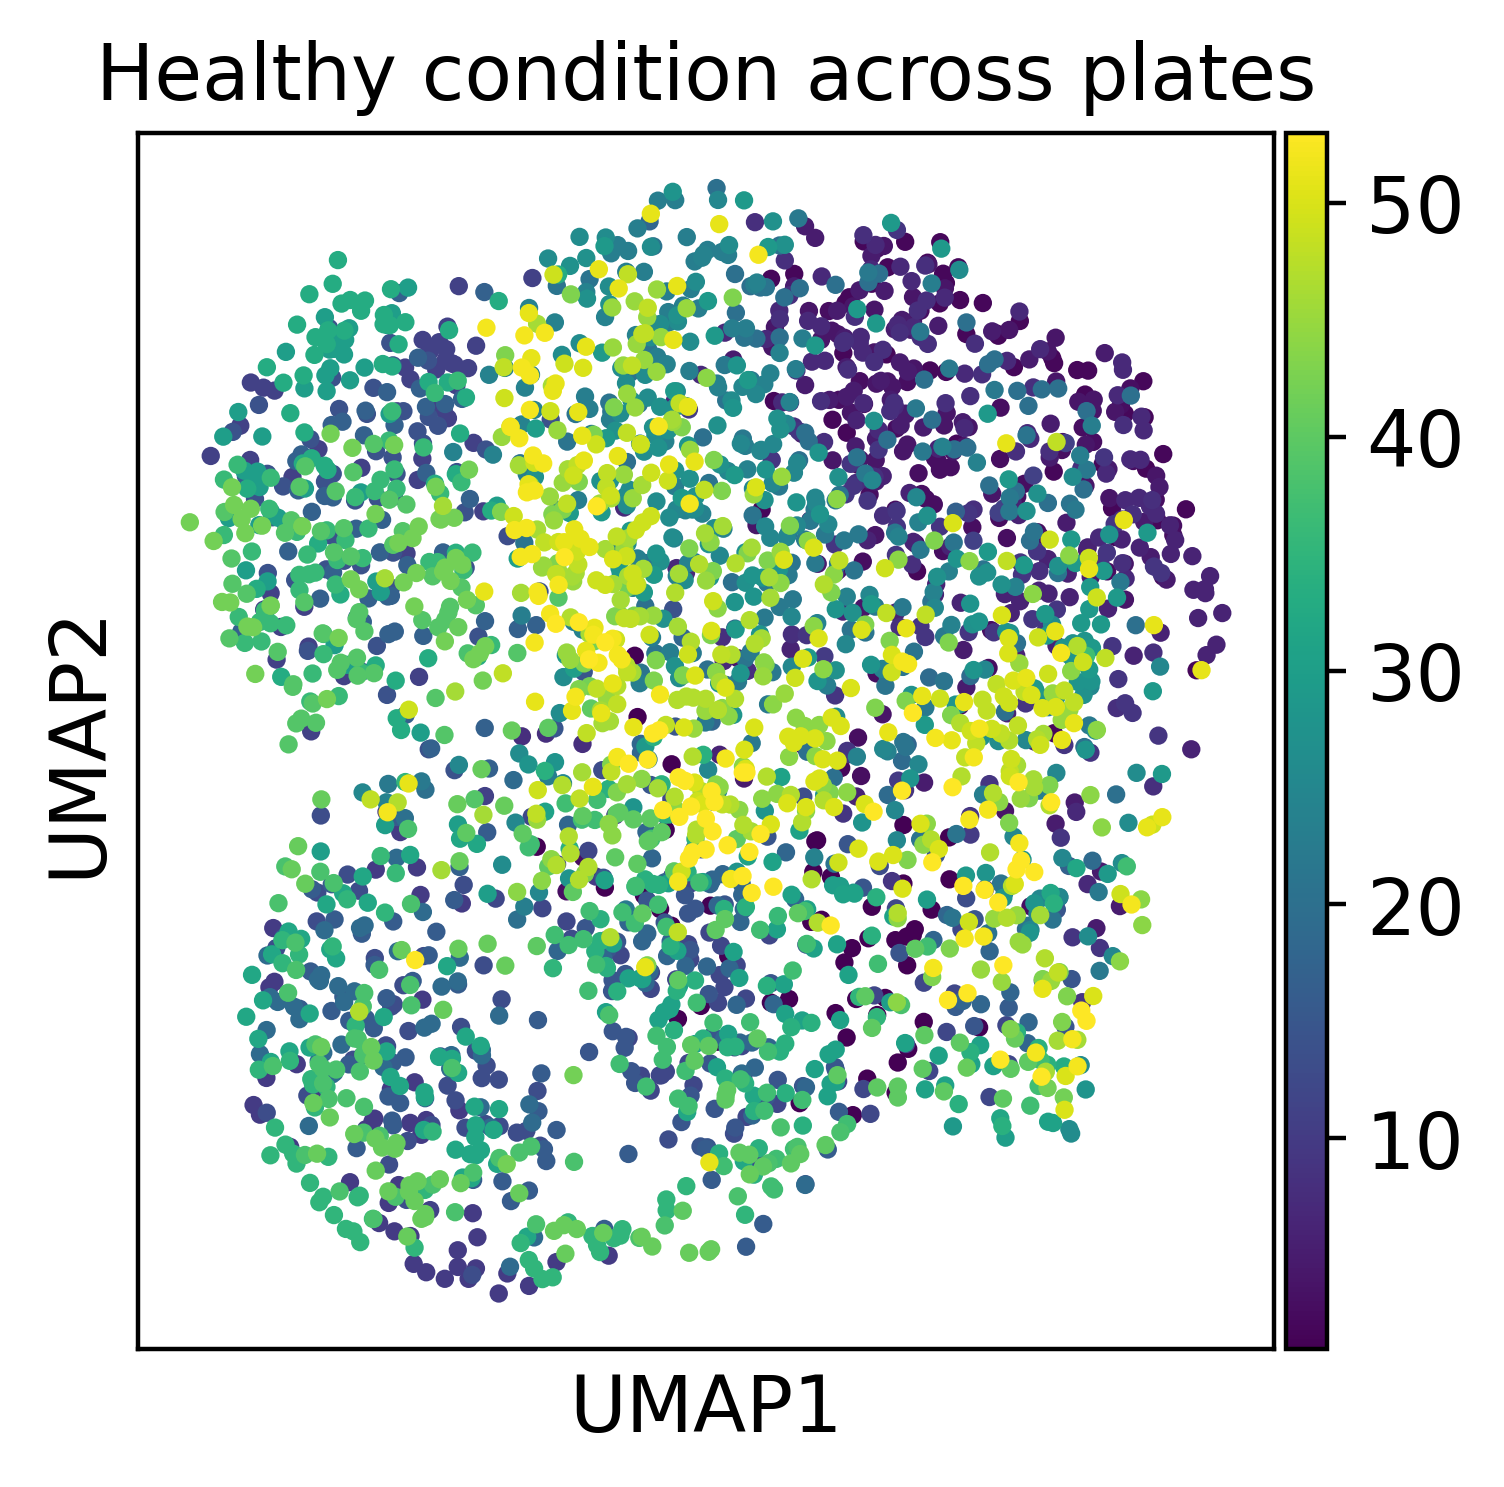

In [28]:
healthy = adata[adata.obs["disease_condition"] == "healthy"]
sc.pp.neighbors(healthy, n_neighbors=15, use_rep = "X")
sc.tl.umap(healthy)
sc.pl.umap(healthy, color=["plate"], title = "Healthy condition across plates")

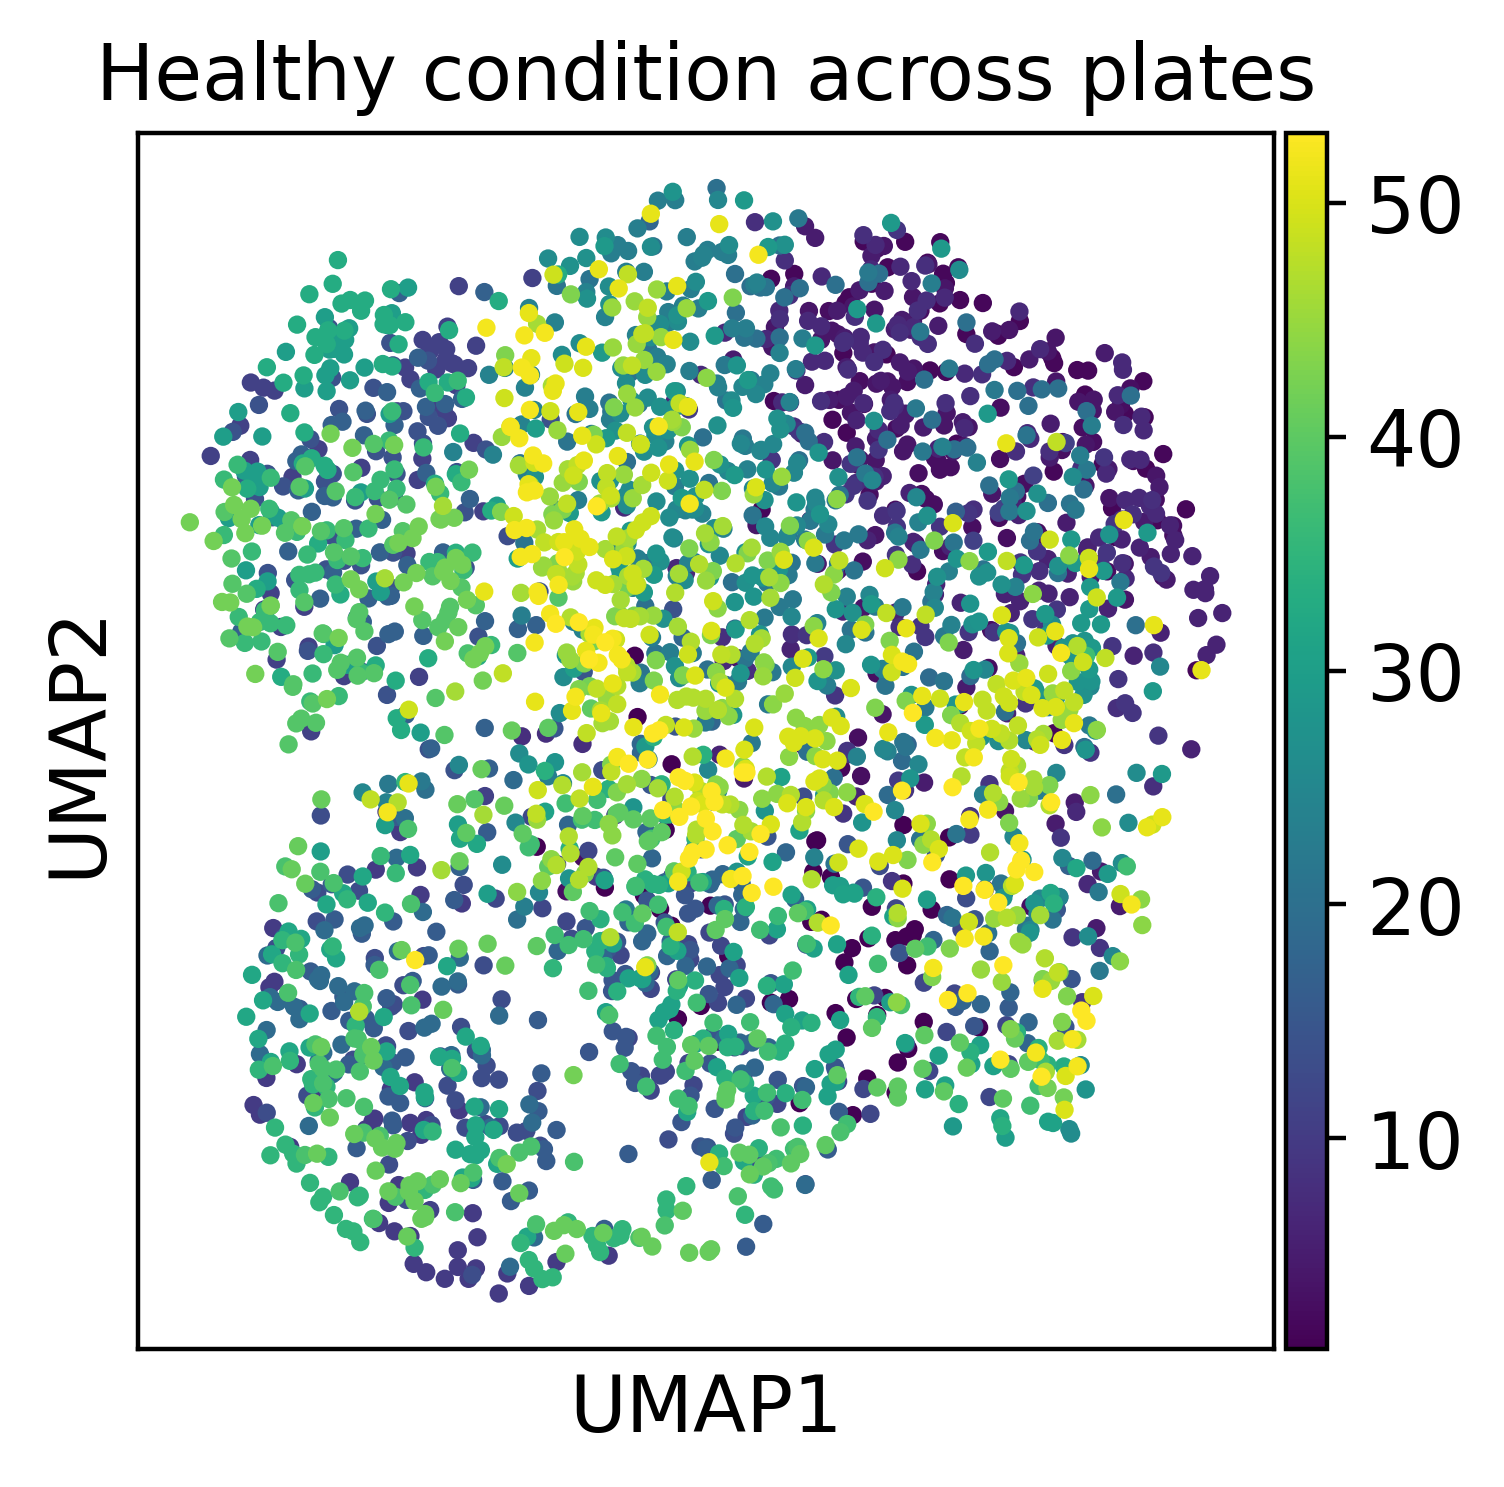

In [29]:
healthy = adata[adata.obs["disease_condition"] == "healthy"]
sc.pp.neighbors(healthy, n_neighbors=15, use_rep = "X")
sc.tl.umap(healthy)
sc.pl.umap(healthy, color=["plate"], title = "Healthy condition across plates")